In [2]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [3]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [4]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [5]:
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


In [6]:
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


In [7]:
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


In [8]:
distance_rr2016 = rr_2016['distance'].sum()
print("overall distance travelled",distance_rr2016)
average_rr2016 = rr_2016.speed.mean()
print("the average speed was ",average_rr2016)
rr_2016.describe()


overall distance travelled 49.04858574628638
the average speed was  34.93308475482947


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000


In [9]:
distance_tt2016 = tt_2016['distance'].sum()
print("overall distance travelled",distance_tt2016)
average_tt2016 = tt_2016.speed.mean()
print("the average speed was ",average_tt2016)
tt_2016.describe()

overall distance travelled 24.80288703130808
the average speed was  33.52996304869014


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000


In [10]:
distance_rr2019 = rr_2019['distance'].sum()
print("overall distance travelled",distance_rr2019)
average_rr2019 = rr_2019.speed.mean()
print("the average speed was ",average_rr2019)
rr_2019.describe()

overall distance travelled 51.7891325359606
the average speed was  33.87986137188044


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0
mean,-33.371644,151.225232,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861,1.0
std,0.030592,0.006142,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503,0.0
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,1.0
25%,-33.396939,151.221591,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962,1.0
50%,-33.373835,151.227064,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0
75%,-33.344994,151.229977,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026,1.0
max,-33.316865,151.235094,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469,1.0


In [11]:
distance_tt2019 = tt_2019['distance'].sum()
print("overall distance travelled",distance_tt2019)
average_tt2019 = tt_2019.speed.mean()
print("the average speed was ",average_tt2019)
tt_2019.describe()

overall distance travelled 24.38014504376575
the average speed was  33.05782378815691


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0


Above, Question 1 is answered which represents the overall speed, average speed and the summary for each ride.

In [12]:
rr_2016_clean = rr_2016.drop(rr_2016.index[(rr_2016.speed > 80)])
rr_2019_clean = rr_2019.drop(rr_2019.index[(rr_2019.speed > 80)])
tt_2016_clean = tt_2016.drop(tt_2016.index[(tt_2016.speed > 80)])
tt_2019_clean = tt_2019.drop(tt_2019.index[(tt_2019.speed > 80)])

# Here, i have removed the outliers where the speed was above 80.

Using boxplot and scatterplot, it was observed that the dataset has some outliers. So, by observing 80km/h seems suitable speed for cyclists, and the speed beyond that can be treated as an outlier.

In [13]:
r1_2016 = rr_2016_clean.speed.max()
print("the max speed in road race 2016 was", r1_2016)
t1_2016 = tt_2016_clean.speed.max()
print("the max speed in time trail 2016 was", t1_2016)
r2_2019 = rr_2019_clean.speed.max()
print("the max speed in road race 2019 was", r2_2019)
t2_2019 = tt_2019_clean.speed.max()
print("the max speed in time trail 2019 was", t2_2019)

# Range of speeds in different races

r3_2016 = rr_2016_clean.speed.min()
print("the min speed in road race 2016 was", r3_2016)
t3_2016 = tt_2016_clean.speed.min()
print("the min speed in time trail 2016 was", t3_2016)
r4_2019 = rr_2019_clean.speed.min()
print("the min speed in road race 2019 was", r4_2019)
t4_2019 = tt_2019_clean.speed.min()
print("the min speed in time trail 2019 was", t4_2019)

the max speed in road race 2016 was 70.70948664334745
the max speed in time trail 2016 was 67.86201094032148
the max speed in road race 2019 was 70.37046868335639
the max speed in time trail 2019 was 63.300734121945005
the min speed in road race 2016 was 0.0
the min speed in time trail 2016 was 0.0
the min speed in road race 2019 was 0.0
the min speed in time trail 2019 was 0.0


In [14]:
rr_2016_ca = rr_2016_clean.speed.mean()
tt_2016_ca = tt_2016_clean.speed.mean()
rr_2019_ca = rr_2019_clean.speed.mean()
tt_2019_ca = tt_2019_clean.speed.mean()

In [15]:
print("the difference between road race and time trail of 2016 in the terms of max speed was", r1_2016-t1_2016 )
print("the difference between road race and time trail of 2016 in the terms of average speed was", rr_2016_ca-tt_2016_ca)
print("the difference between road race and time trail of 2019 in the terms of max speed was", r2_2019-t2_2019 )
print("the difference between road race and time trail of 2019 in the terms of average speed was", rr_2019_ca-tt_2019_ca)

the difference between road race and time trail of 2016 in the terms of max speed was 2.847475703025964
the difference between road race and time trail of 2016 in the terms of average speed was 1.4470575616616372
the difference between road race and time trail of 2019 in the terms of max speed was 7.069734561411387
the difference between road race and time trail of 2019 in the terms of average speed was 0.8220375837235281


### Conclusion:
As observed from the above data the max and average speed of road race was 2.85km/hr and 1.45km/hr respectively more than the time trial race in 2016.
Similarly in 2019, the max and the average speed of the road race was 7.07km/hr and 0.82km/hr respectively much more than the speed in the time trial.
So, from the above data, it is clear that road races are much faster than time trial races.

The above answer completes Question 2.

In [16]:
concatenated = pd.concat([tt_2016_clean, tt_2019_clean], join='outer')
concatenated

#joining two datasets tt_2016_clean and tt_2019_clean

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0


In [17]:
concatenated['year'] = pd.DatetimeIndex(concatenated.index).year
concatenated['averages'] = concatenated.groupby(concatenated.year)['speed'].transform('mean')
concatenated['Comparison'] = concatenated['speed'].gt(concatenated['averages'])
concatenated

#created a new columns year, average, and Comparison 

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,year,averages,Comparison
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN,2016,33.446213,False
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0,2016,33.446213,False
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0,2016,33.446213,False
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0,2016,33.446213,False
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0,2016,33.446213,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,2019,33.057824,True
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,2019,33.057824,True
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,2019,33.057824,True
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0,2019,33.057824,True


Above, a new column is added named as a comparison. In this column, speeds are compared with averages of two years i.e 2016 and 2019. And the values TRUE OR FALSE is given, TRUE means that the speed at that particular time was more than the average speed, and FALSE means that the speed at that particular time was less than the average.

In [18]:
tt_2016_cleans = tt_2016_clean
tt_2016_cleans.rename(columns = {"speed": "speed_2016"}, 
          inplace = True)

In [19]:
det = pd.concat([tt_2016_cleans, tt_2019_clean], join = 'outer', axis = 1)
det['year'] = pd.DatetimeIndex(det.index).year
det

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed_2016,...,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,year
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,2019
2019-06-01 23:39:06+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,2019
2019-06-01 23:39:07+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,2019
2019-06-01 23:39:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0,2019


In [20]:
print("max speed in 2019 time trial race",det.speed.idxmax(), det.speed.max())
print("max speed in 2019 time trial race",det.speed_2016.idxmax(), det.speed_2016.max())

max speed in 2019 time trial race 2019-06-01 23:01:02+00:00 63.300734121945005
max speed in 2019 time trial race 2016-07-02 23:12:00+00:00 67.86201094032148


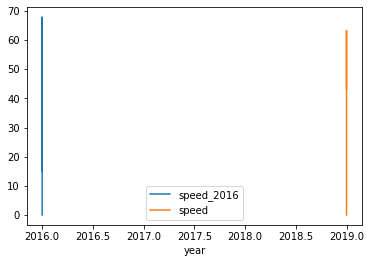

In [21]:
det.plot(x="year", y=["speed_2016", "speed"])
plt.show()

While comparing the two time trail races, the maximum speed achieved in time trail was in 2016 which is 67.86 km/h as observed in the above graph.

Above answer completes Question 3.

In [22]:
tt_2016_clean['elevation category']=pd.cut(tt_2016_clean['elevation_gain'], bins=[-8,-0.20000000000000284,0.5,3], include_lowest=True, labels=['descending', 'flat', 'climbing'])
tt_2016_clean['elevation averages'] = tt_2016_clean.groupby(tt_2016_clean['elevation category'])['elevation_gain'].transform('mean')
tt_2016_clean

# assigning elevation category to time trial 2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed_2016,timedelta,elevation category,elevation averages
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN,flat,0.203268
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0,flat,0.203268
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0,flat,0.203268
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0,flat,0.203268
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0,flat,0.203268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0,flat,0.203268
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0,descending,-0.630172
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0,flat,0.203268
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0,descending,-0.630172


In [23]:
rr_2016_clean['elevation category']=pd.cut(rr_2016_clean['elevation_gain'], bins=[-2,-0.20000000000000284,0.5,3], include_lowest=True, labels=['descending', 'flat', 'climbing'])
rr_2016_clean['elevation averages'] = rr_2016_clean.groupby(rr_2016_clean['elevation category'])['elevation_gain'].transform('mean')
rr_2016_clean

# assigning elevation category to road race 2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,elevation category,elevation averages
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN,flat,0.214268
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,flat,0.214268
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,flat,0.214268
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,flat,0.214268
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,flat,0.214268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,flat,0.214268
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,flat,0.214268
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,flat,0.214268
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,flat,0.214268


In [24]:
rr_2019_clean['elevation category']=pd.cut(rr_2019_clean['elevation_gain'], bins=[-2,-0.19999999999998863,0.5,3], include_lowest=True, labels=['descending', 'flat', 'climbing'])
rr_2019_clean['elevation averages'] = rr_2019_clean.groupby(rr_2019_clean['elevation category'])['elevation_gain'].transform('mean')
rr_2019_clean

# assigning elevation category to road race 2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,elevation category,elevation averages
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN,flat,0.162975
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,flat,0.162975
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,descending,-0.398027
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,flat,0.162975
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,flat,0.162975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:23+00:00,-33.415728,151.222289,216.6,7.0,28.0,23.0,153.0,0.010218,-0.2,36.786246,1.0,descending,-0.398027
2019-06-23 00:05:24+00:00,-33.415808,151.222340,216.6,7.0,13.0,10.0,153.0,0.010077,0.0,36.275739,1.0,flat,0.162975
2019-06-23 00:05:25+00:00,-33.415885,151.222391,216.6,7.0,0.0,0.0,152.0,0.009783,0.0,35.220093,1.0,flat,0.162975
2019-06-23 00:05:26+00:00,-33.415962,151.222440,216.6,7.0,0.0,0.0,152.0,0.009695,0.0,34.901660,1.0,flat,0.162975


In [25]:
tt_2019_clean['elevation category']=pd.cut(tt_2019_clean['elevation_gain'], bins=[-2,-0.19999999999998863,0.5,3], include_lowest=True, labels=['descending', 'flat', 'climbing'])
tt_2019_clean['elevation averages'] = tt_2019_clean.groupby(tt_2019_clean['elevation category'])['elevation_gain'].transform('mean')
tt_2019_clean

# assigning elevation category to time trial 2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,elevation category,elevation averages
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN,flat,0.151574
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0,flat,0.151574
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0,flat,0.151574
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0,flat,0.151574
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0,flat,0.151574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,descending,-0.361104
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,flat,0.151574
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,descending,-0.361104
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0,descending,-0.361104


Above, all 4 datasets for races have been divided into 3 categories namely climbing, flat, and descending using the elevation_gain column. The criteria to separate these columns are:
1. If the elevation_gain is negative then it is treated as if the bike is descending.
2. If the elevation_gain is between 0 and 0.5 it is treated as the bike is moving on a flat road.
3. And if the elevation_gain is beyond 0.5, it is treated as the bike has started to climb
So, a new column is created elevation category to segregate the dataset with these 3 categories. Furthermore, we have used this column to calculate the average speeds in those three cases, represented by elevation averages.

Above answer completes Question 4.

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [30]:
tt_2016_clean = tt_2016_clean[tt_2016_clean.cadence > 0]
dev_tt_2016 = 1000*(tt_2016_clean.speed_2016/60)/tt_2016_clean.cadence
dev_tt_2016 = dev_tt_2016[(dev_tt_2016>2)&(dev_tt_2016<10)]
dev_tt_2016

#Calculation of development

2016-07-02 23:05:32+00:00    3.186533
2016-07-02 23:06:04+00:00    2.733911
2016-07-02 23:06:06+00:00    4.290435
2016-07-02 23:06:08+00:00    6.072486
2016-07-02 23:06:11+00:00    8.932350
                               ...   
2016-07-02 23:50:37+00:00    7.416822
2016-07-02 23:50:39+00:00    7.496771
2016-07-02 23:50:41+00:00    7.388075
2016-07-02 23:51:16+00:00    8.714967
2016-07-02 23:51:17+00:00    3.905163
Length: 1452, dtype: float64

<AxesSubplot:>

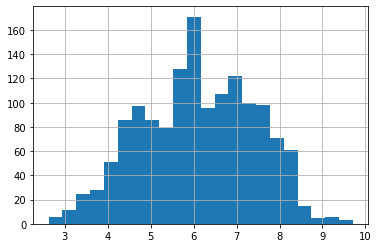

In [31]:
dev_tt_2016.hist(bins=22)

In [32]:
rr_2016_clean = rr_2016_clean[rr_2016_clean.cadence > 0]
dev_rr_2016 = 1000*(rr_2016_clean.speed/60)/rr_2016_clean.cadence
dev_rr_2016 = dev_rr_2016[(dev_rr_2016>2)&(dev_rr_2016<10)]
dev_rr_2016

#Calculation of development

2016-05-14 04:02:42+00:00    4.907092
2016-05-14 04:02:46+00:00    6.822931
2016-05-14 04:02:49+00:00    6.437546
2016-05-14 04:02:51+00:00    6.393775
2016-05-14 04:02:52+00:00    6.881715
                               ...   
2016-05-14 05:28:40+00:00    7.663577
2016-05-14 05:28:44+00:00    8.032992
2016-05-14 05:28:45+00:00    7.798309
2016-05-14 05:28:54+00:00    8.278524
2016-05-14 05:28:56+00:00    7.884356
Length: 2187, dtype: float64

<AxesSubplot:>

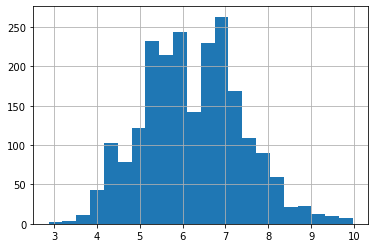

In [33]:
dev_rr_2016.hist(bins=22)

In [36]:
tt_2019_clean = tt_2019_clean[tt_2019_clean.cadence > 0]
dev_tt_2019 = 1000*(tt_2019_clean.speed/60)/tt_2019_clean.cadence
dev_tt_2019 = dev_tt_2019[(dev_tt_2019>2)&(dev_tt_2019<10)]
dev_tt_2019

#Calculation of development

2019-06-01 22:55:05+00:00    5.453639
2019-06-01 22:55:06+00:00    2.225050
2019-06-01 22:55:07+00:00    5.461272
2019-06-01 22:55:08+00:00    5.253161
2019-06-01 22:55:09+00:00    5.354744
                               ...   
2019-06-01 23:39:05+00:00    7.320711
2019-06-01 23:39:06+00:00    7.262362
2019-06-01 23:39:07+00:00    7.254161
2019-06-01 23:39:08+00:00    7.313255
2019-06-01 23:39:09+00:00    9.878877
Length: 2552, dtype: float64

<AxesSubplot:>

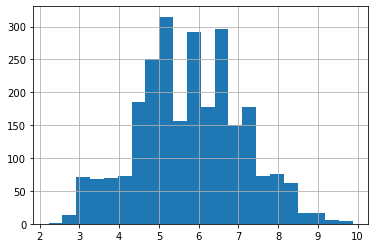

In [35]:
dev_tt_2019.hist(bins=22)

In [38]:
rr_2019_clean = rr_2019_clean[rr_2019_clean.cadence > 0]
dev_rr_2019 = 1000*(rr_2019_clean.speed/60)/rr_2019_clean.cadence
dev_rr_2019 = dev_rr_2019[(dev_rr_2019>2)&(dev_rr_2019<10)]
dev_rr_2019

#Calculation of development

2019-06-22 22:33:46+00:00    4.839850
2019-06-22 22:33:47+00:00    5.936409
2019-06-22 22:33:48+00:00    6.491233
2019-06-22 22:33:49+00:00    6.512249
2019-06-22 22:33:50+00:00    6.544346
                               ...   
2019-06-23 00:05:16+00:00    6.891446
2019-06-23 00:05:17+00:00    6.874112
2019-06-23 00:05:18+00:00    6.846311
2019-06-23 00:05:19+00:00    6.818900
2019-06-23 00:05:20+00:00    7.271756
Length: 4307, dtype: float64

<AxesSubplot:>

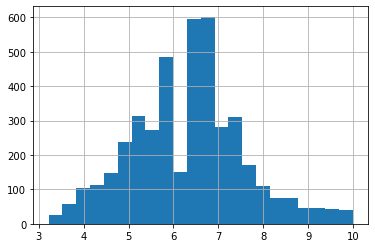

In [39]:
dev_rr_2019.hist(bins=22)

In dev_rr_2019 graph and dev_tt_2019, low and high values of development occurs more frequently when compared to the rides of 2016. Which means that the rider climbed up and down the hill frequently when compared to the rest of the rides.The rider changed the gear much more frequently in these rides.
In rides 2016, the majority of values for development lie in the range of 5 to 7.5. The rider gradually climbed the hill and then came downhill in rides 2016. Rides in 2016 had less up and down hills as compared to the the rides in 2019.
